In [2]:
import tensorflow as tf
import tensorflow.keras as kr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = kr.models.load_model("Best_model.keras")
import requests
from io import BytesIO
from PIL import Image
import os
def resizeimg(x):
    if (x.shape[0] > 140) or (x.shape[1]>162):
        x = tf.image.resize(x,(140,162))
        print(x.shape)
        return x
    else:
        return tf.image.resize_with_crop_or_pad(x,140,162)

datasetpaths = [os.path.join(r"dataset", i) for i in os.listdir(r"dataset")]
print(datasetpaths)

def imgfrompath(x):
    image = plt.imread(x)
    image_resize = tf.image.resize_with_crop_or_pad(image,140,162)
    return image_resize


shapey = 10
breedsonehot = {"Golden Retriever":0,
"German Shepherd":1,
"Labrador Retriever":2,
"Bulldog":3,
"Beagle":4,
"Poodle":5,
"Rottweiler":6,
"Yorkshire Terrier":7,
"Boxer":8,
"Dachshund":9}

breedsonehot = {v: k for k, v in breedsonehot.items()}

Beagle = [os.path.join(datasetpaths[0],i) for i in os.listdir(datasetpaths[0])]

Boxer = [os.path.join(datasetpaths[1],i) for i in os.listdir(datasetpaths[1])]

Bulldog = [os.path.join(datasetpaths[2],i) for i in os.listdir(datasetpaths[2])]

Dachshund = [os.path.join(datasetpaths[3],i) for i in os.listdir(datasetpaths[3])]

German_Shepherd = [os.path.join(datasetpaths[4],i) for i in os.listdir(datasetpaths[4])]

Golden_Retriever = [os.path.join(datasetpaths[5],i) for i in os.listdir(datasetpaths[5])]

Labrador_Retriever = [os.path.join(datasetpaths[6],i) for i in os.listdir(datasetpaths[6])]

Poodle = [os.path.join(datasetpaths[7],i) for i in os.listdir(datasetpaths[7])]

Rottweiler = [os.path.join(datasetpaths[8],i) for i in os.listdir(datasetpaths[8])]

Yorkshire_Terrier = [os.path.join(datasetpaths[9],i) for i in os.listdir(datasetpaths[9])]

['dataset\\Beagle', 'dataset\\Boxer', 'dataset\\Bulldog', 'dataset\\Dachshund', 'dataset\\German_Shepherd', 'dataset\\Golden_Retriever', 'dataset\\Labrador_Retriever', 'dataset\\Poodle', 'dataset\\Rottweiler', 'dataset\\Yorkshire_Terrier']


(140, 162, 3)


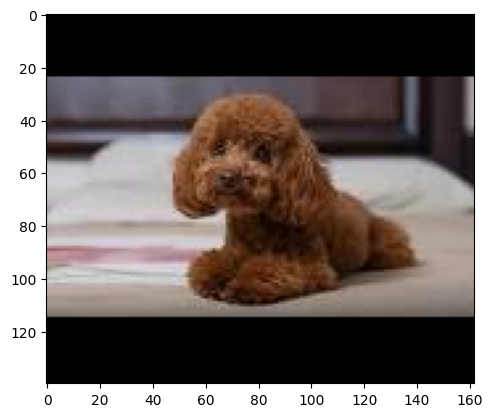

In [30]:
im = imgfrompath(Poodle[0])
re_im = np.expand_dims(im,0)
re_im = re_im.astype('float32') / 255.0
print(im.shape)


plt.imshow(im)

In [31]:
breedsonehot[np.argmax(model(re_im))]

'Poodle'

(140, 162, 3)


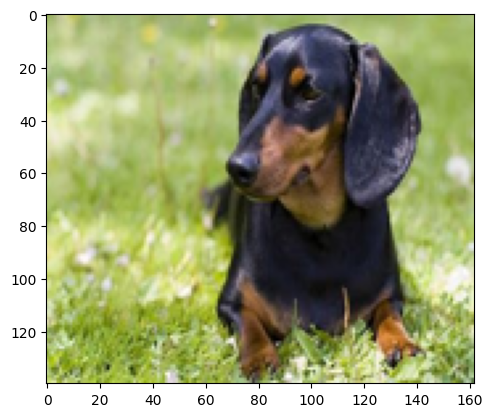

In [23]:
plt.imshow(tf.image.resize_with_crop_or_pad(im,140,162))
print(tf.image.resize_with_pad(im,140,162).shape)
x_input = np.load("inputimage.npy").astype(np.int32) /255
y_input = np.load("outputimage.npy").astype(np.int32) /255

In [24]:
model.evaluate(x_input,y_input)

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.9995 - loss: 2.2499e-05


[4.988478758605197e-05, 0.998965859413147]

In [10]:
y_input.shape

(967, 10)

In [11]:
model.evaluate?

Signature:
model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    return_dict=False,
    **kwargs,
)
Docstring:
Returns the loss value & metrics values for the model in test mode.

Computation is done in batches (see the `batch_size` arg.)

Args:
    x: Input data. It could be:
        - A NumPy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
        - A tensor, or a list of tensors
            (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
        - A `tf.data.Dataset`. Should return a tuple
            of either `(inputs, targets)` or
            `(inputs, targets, sample_weights)`.
        - A generator or `keras.utils.PyDataset` returning
            `(inputs, targets)` or `(inputs, targets, sample_weights)`.
    y: Target data. Like the 